<a href="https://colab.research.google.com/github/sadrasa97/skin-cancer/blob/main/skin_cancer_saremi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import os
#import zipfile
#unzip_dataset
#local_zip='/content/drive/MyDrive/skincancer.zip'
#zip_ref=zipfile.ZipFile(local_zip,'r')
#zip_ref.extractall('/content/drive/MyDrive/skin')

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
from sklearn import model_selection
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

In [5]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.utils import to_categorical

In [6]:
np.random.seed(1)

In [7]:
import cv2
import os
import glob
import gc

def lire_images(img_dir, xdim, ydim, nmax=5000) :
    label = 0
    label_names = []
    X = []
    y=[]
    for dirname in os.listdir(img_dir):
        print(dirname)
        label_names.append(dirname)
        data_path = os.path.join(img_dir + "/" + dirname,'*g')
        files = glob.glob(data_path)
        n=0
        for f1 in files:
            if n>nmax : break
            img = cv2.imread(f1) 
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            img = cv2.resize(img, (xdim,ydim))
            X.append(np.array(img)) 
            y.append(label) 
            n=n+1
        print(n,' images lues')
        label = label+1
    X = np.array(X)
    y = np.array(y)
    gc.collect() 
    return X,y, label, label_names

In [8]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

In [9]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      shear_range=0.2,
      zoom_range=0.2,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

#test_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(
                    "../content/drive/MyDrive/train",
                    batch_size=128,
                    class_mode='binary',
                    shuffle=True,
                    target_size=(244,244)
)     

#test_generator =  test_datagen.flow_from_directory(
#                    "../content/drive/MyDrive/test",
#                    batch_size=128,
#                    class_mode='binary',
#                    shuffle=True,
#                    target_size=(244,244)
#)

Found 2637 images belonging to 2 classes.


In [10]:
X,y,Number_classes,Classes = lire_images("../content/drive/MyDrive/train", 244, 244, 1400)

benign
1401  images lues
malignant
1197  images lues


In [11]:
Number_classes

2

In [12]:
Classes

['benign', 'malignant']

In [13]:
X_test,y_test,_,__ = lire_images("../content/drive/MyDrive/test", 244, 244,400) 


benign
360  images lues
malignant
300  images lues


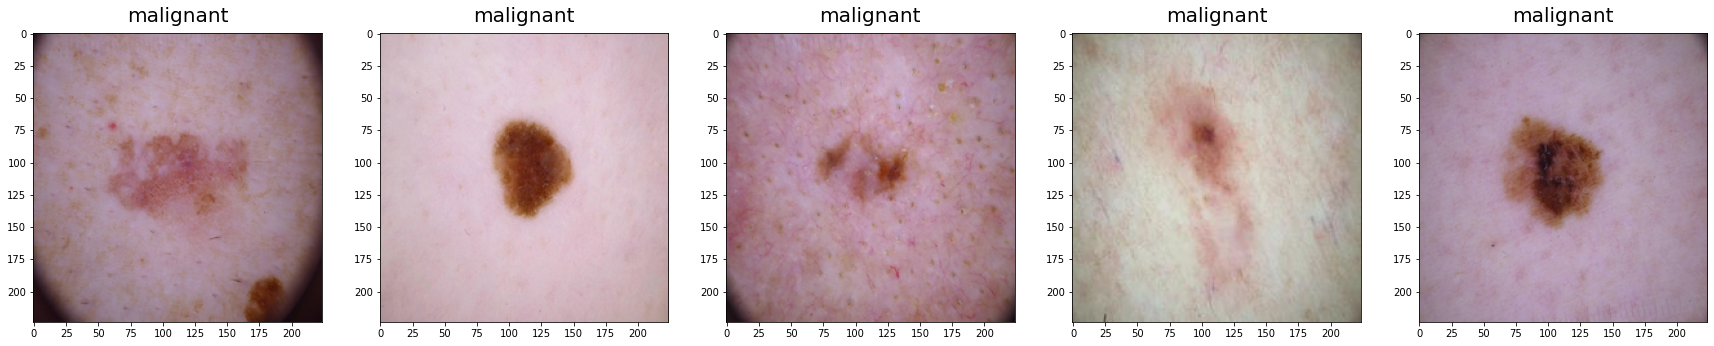

In [14]:
select_folder="malignant"
rows,columns = 1,5
trainxx='../content/drive/MyDrive/train'
display_folder=os.path.join(trainxx,select_folder)
total_images=rows*columns
fig=plt.figure(1, figsize=(30, 10))

for i,j in enumerate(os.listdir(display_folder)):      
    
    img = plt.imread(os.path.join(trainxx,select_folder,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_folder, pad = 11, size=20)
    plt.imshow(img)
    
    if i==total_images-1:
        break

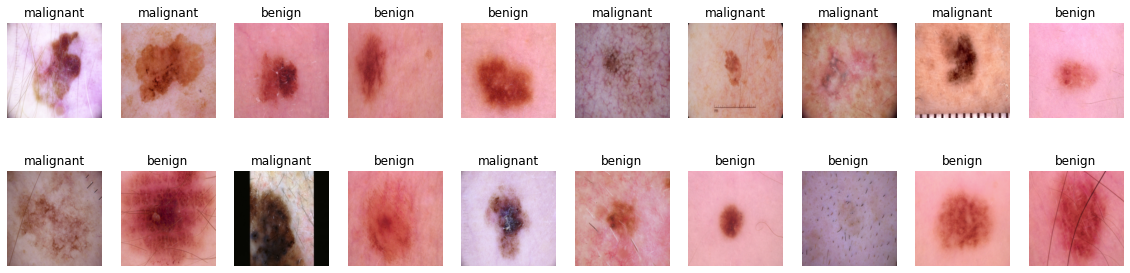

In [15]:
import random
plt.figure(figsize=(20,5))
for i in range(0,20) :
    plt.subplot(2,10,i+1)
    j = random.randint(0,len(X))
    plt.axis('off')
    plt.imshow(X[j])
    plt.title(Classes[y[j]])

In [16]:

X = X / 255
X_test = X_test / 255

In [17]:
ratio_val = 0.20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=ratio_val,random_state=1,shuffle=True)

In [18]:
print(X.shape)
print(y.shape)
print(X_test.shape)
#print(X)
#img = plt.imread(os.path.join('/content/drive/MyDrive/train/benign/1089.jpg'))
#plt.imshow(img)

(2598, 244, 244, 3)
(2598,)
(660, 244, 244, 3)


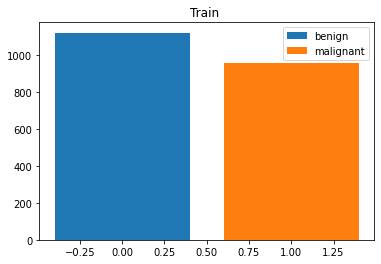

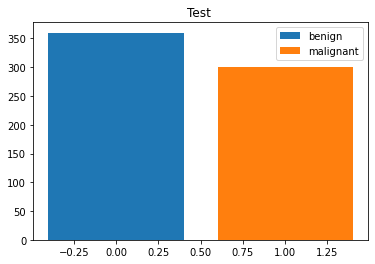

In [19]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Train ")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test ")
plt.show()

In [20]:
Algorithm = []
Accuracy = []

In [21]:

model = Sequential()
model.add(Conv2D(36, (3, 3),padding='same', input_shape=(244, 244, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(76, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(96, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(38, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(Number_classes, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 36)      1008      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 122, 122, 36)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 122, 122, 36)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 76)      24700     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 76)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 61, 61, 76)        0

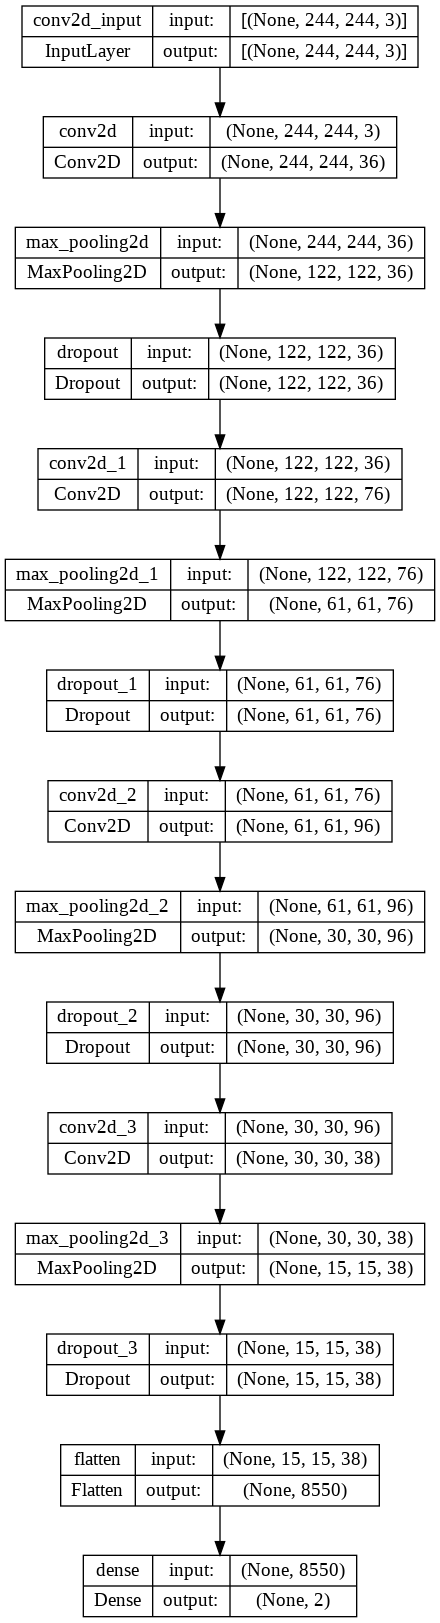

In [23]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=36, verbose=1)
scores = model.evaluate(X_val, y_val, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Epoch 1/36
65/65 [==============================] - 344s 5s/step - loss: 0.6324 - accuracy: 0.6362 - val_loss: 0.4982 - val_accuracy: 0.7731
Epoch 2/36
 9/65 [===>..........................] - ETA: 4:58 - loss: 0.5227 - accuracy: 0.7326

In [ ]:
plot_scores(train)

In [ ]:
Algorithm.append('Convolutional neural network')
Accuracy.append(scores[1] * 100)
#Accuracy2=train.history['accuracy'])
print(Algorithm[-1] +  ': ', Accuracy[-1])
#print(Accuracy2)

In [ ]:
# Prediction
y_cnn = np.argmax(model.predict(X_test),axis=1)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='accuracy')
plt.plot(train.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
cm = confusion_matrix(y_test, y_cnn)
sns.heatmap(cm,annot = True, cmap="YlGnBu")

In [ ]:
print(classification_report(y_test, y_cnn, target_names = ['Benign (Class 0)','Malignant(Class 1)']))

In [ ]:
model = SVC()
model.fit(X_train.reshape(X_train.shape[0],-1), y_train)

y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))

Algorithm.append('Support vector machine ')
Accuracy.append(accuracy_score(y_test, y_pred)*100)

print(Algorithm[-1] +  ': ', Accuracy[-1])

In [ ]:
cm = confusion_matrix(y_test, y_cnn)
sns.heatmap(cm,annot = True, cmap="plasma")

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(244,244,3))
vgg16.trainable = False

In [ ]:
vgg16.summary()

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(Number_classes, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [ ]:
model.summary()

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=35, verbose=1)
# Test
scores = model.evaluate(X_val, y_val, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

In [ ]:
Algorithm.append('VGG16')
Accuracy.append(scores[1] * 100)

print(Algorithm[-1] +  ': ', Accuracy[-1])

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='accuracy')
plt.plot(train.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
# Prediction
y_cnn = np.argmax(model.predict(X_test),axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_cnn)
sns.heatmap(cm,annot = True, cmap="YlGnBu")

In [ ]:
print(classification_report(y_test, y_cnn, target_names = ['Benign (Class 0)','Malignant(Class 1)']))

In [ ]:
plt.figure(figsize=(20,25))
n_test = X_test.shape[0]
i = 1

for j in range(0,len(X_test)):
    if (y_cnn[j] != y_test[j]) & (i<150) :
        plt.subplot(15,10,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (Classes[y_cnn[j]], Classes[y_test[j]]))
        i+=1
y_cnn_misclassified = i - 1
print(f"nombre d'images mal classées:--> {y_cnn_misclassified}\n")

In [ ]:
for i in range (len(vgg16.layers)):
    print (i,vgg16.layers[i])

In [ ]:
for layer in vgg16.layers[0:5]:
    layer.trainable=False
for layer in vgg16.layers[5:10]:
    layer.trainable=True
for layer in vgg16.layers[10:15]:
    layer.trainable=False
for layer in vgg16.layers[15:]:
    layer.trainable=True

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(Number_classes, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, verbose=1)
# Test
scores = model.evaluate(X_val, y_val, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

In [ ]:
Algorithm.append('VGG16 with drop out(0.3)')
Accuracy.append(scores[1] * 100)

print(Algorithm[-1] +  ': ', Accuracy[-1])

In [ ]:
plot_scores(train)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='accuracy')
plt.plot(train.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')


In [ ]:
# Prediction
y_cnn = np.argmax(model.predict(X_test),axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_cnn)
sns.heatmap(cm,annot = True, cmap="YlGnBu")

In [ ]:
print(classification_report(y_test, y_cnn, target_names = ['Benign (Class 0)','Malignant(Class 1)']))

In [ ]:
plt.figure(figsize=(30,25))
n_test = X_test.shape[0]
i = 1

for j in range(0,len(X_test)):
    if (y_cnn[j] != y_test[j]) & (i<100) :
        plt.subplot(10,10,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (Classes[y_cnn[j]], Classes[y_test[j]]))
        i+=1
y_cnn_misclassified = i - 1
print(f"number d'images  classes:--> {y_cnn_misclassified}\n")

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
ResNet50V2 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(244,244,3))
ResNet50V2.trainable = False

In [ ]:
ResNet50V2.summary()

In [ ]:
for i in range (len(ResNet50V2.layers)):
    print (i,ResNet50V2.layers[i])

In [ ]:
for layer in ResNet50V2.layers[:180]:
    layer.trainable=False
for layer in ResNet50V2.layers[180:]:
    layer.trainable=True

In [ ]:
model = Sequential()
model.add(ResNet50V2)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(Number_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=1)
# Test
scores = model.evaluate(X_val, y_val, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

In [ ]:
plot_scores(train)

In [ ]:
Algorithm.append('ResNet50')
Accuracy.append(scores[1] * 100)

print(Algorithm[-1] +  ': ', Accuracy[-1])

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='accuracy')
plt.plot(train.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')


In [ ]:
# Prediction
y_cnn = np.argmax(model.predict(X_test),axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_cnn)
sns.heatmap(cm, annot = True, cmap="YlGnBu")

In [ ]:
print(classification_report(y_test, y_cnn, target_names = ['Benign (Class 0)','Malignant(Class 1)']))

In [ ]:
pd.DataFrame(list(zip(Algorithm, Accuracy)), columns = ['Algorithm', 'Accuracy'])